In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

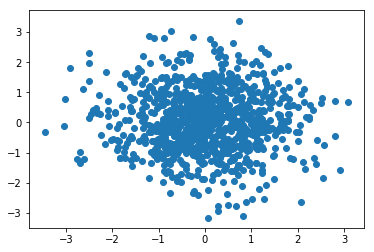

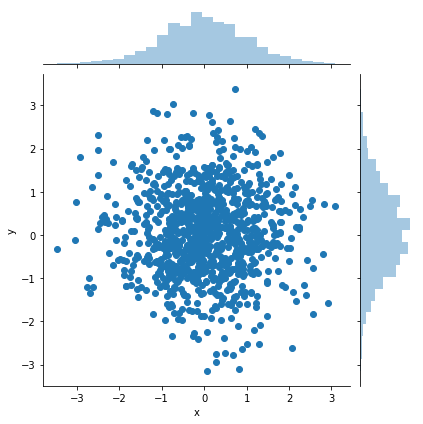

In [80]:
N = 1000;
x = np.random.randn(N)
y = np.random.randn(N)

plt.scatter(x, y, marker=None)

df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x = 'x', y = 'y', data = df, kind = 'scatter')
plt.show()

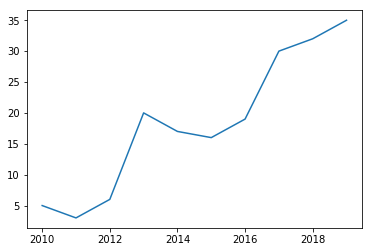

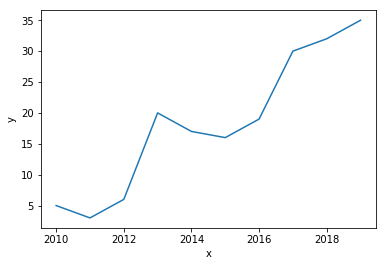

In [82]:
x = np.arange(2010, 2020)
y = [5, 3, 6, 20, 17, 16, 19, 30, 32, 35]
plt.plot(x, y)
plt.show()

df = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(x = 'x', y = 'y', data = df)
plt.show()

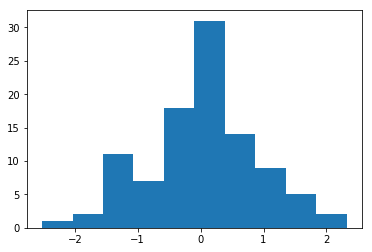

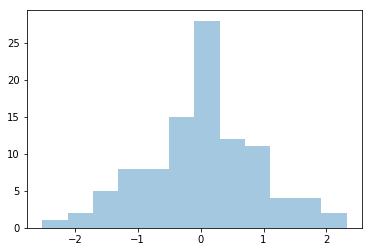

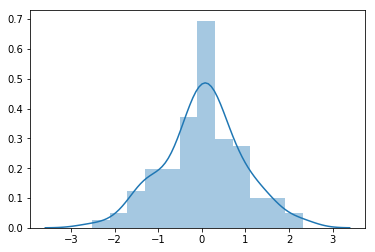

In [85]:
a = np.random.randn(100)
s = pd.Series(a)
plt.hist(a, bins = 10)
plt.show()

sns.distplot(s, kde = False)
plt.show()

sns.distplot(s, kde = True)
plt.show()

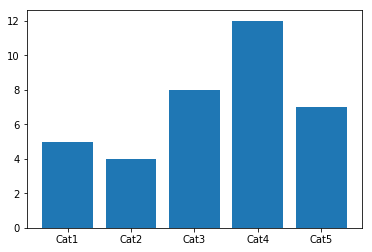

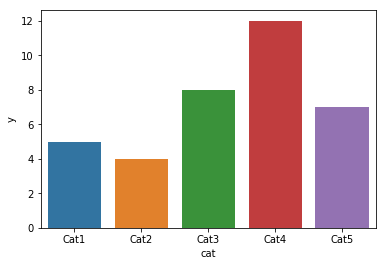

In [49]:
x = ['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5']
y = [5, 4, 8, 12, 7]

plt.bar(x, y)
plt.show()

df = pd.DataFrame({'cat': x, 'y': y})
sns.barplot(x = 'cat', y = 'y', data = df)
plt.show()

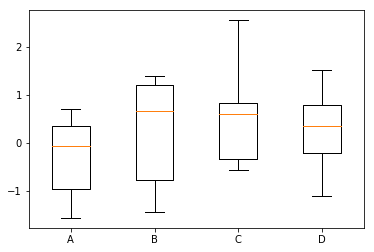

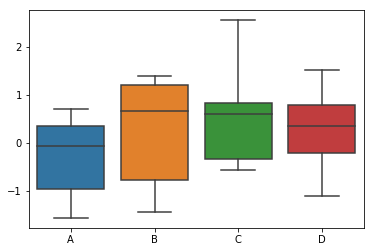

In [54]:
data = np.random.normal(size = (10, 4))
labels = ['A', 'B', 'C', 'D']
plt.boxplot(data, labels = labels)
plt.show()

df = pd.DataFrame(data, columns = labels)
sns.boxplot(data = df)
plt.show()

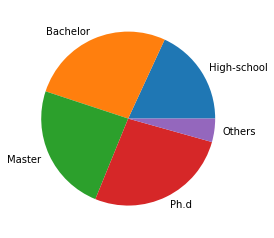

In [55]:
nums = [25, 37, 33, 37, 6]
labels = ['High-school', 'Bachelor', 'Master', 'Ph.d', 'Others']
plt.pie(x = nums, labels = labels)
plt.show()

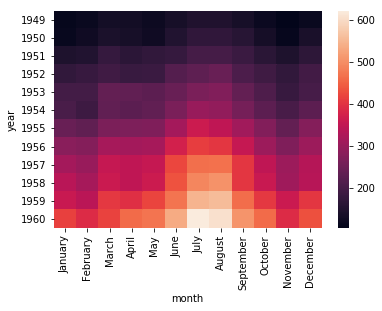

In [59]:
flights = sns.load_dataset('flights')
data = flights.pivot('year', 'month', 'passengers')
sns.heatmap(data)
plt.show()

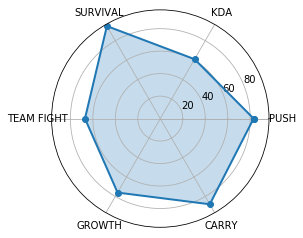

In [72]:
labels = np.array(['PUSH', 'KDA', 'SURVIVAL', 'TEAM FIGHT', 'GROWTH', 'CARRY'])
stats = [83, 61, 95, 67, 76, 88]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint = False)
stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(angles, stats, 'o-', linewidth = 2)
ax.fill(angles, stats, alpha = 0.25)
# font = FontProperties(fname = 'C:\Windows\Fonts\微软雅黑.ttf', size = 14)
ax.set_thetagrids(angles * 180 / np.pi, labels)
plt.show()

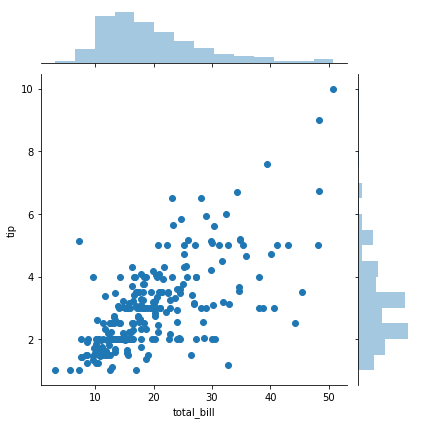

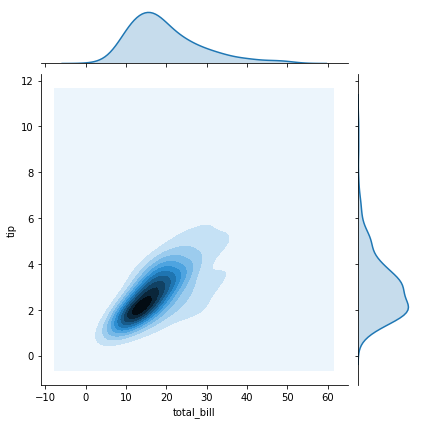

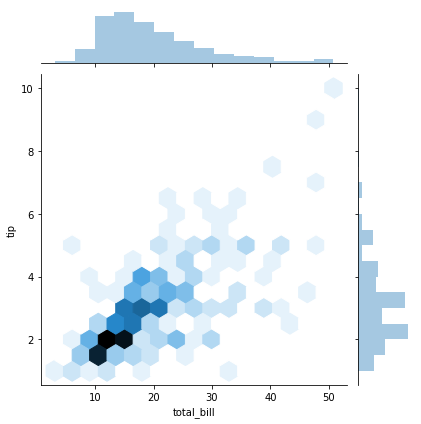

In [73]:
tips = sns.load_dataset('tips')
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'scatter')
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'kde')
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')

plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


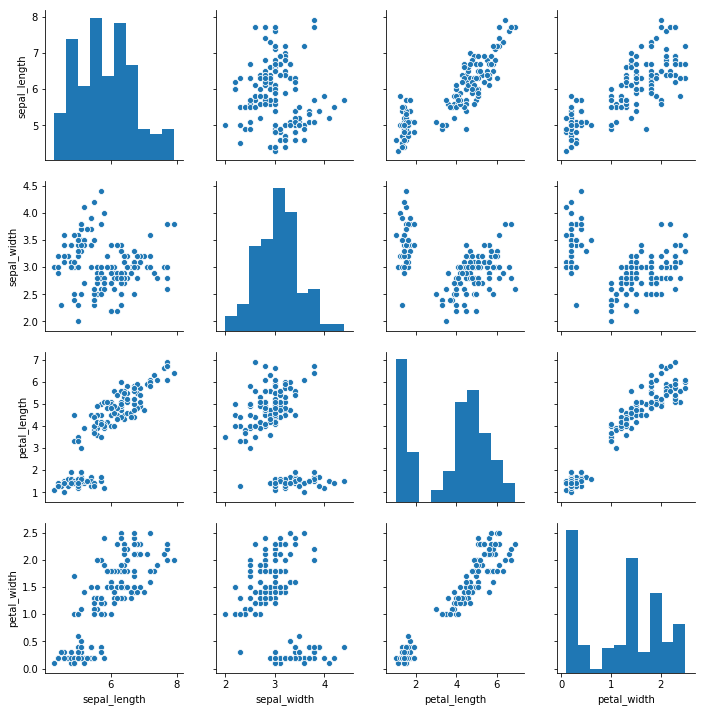

In [77]:
iris = sns.load_dataset('iris')
print(iris.head(10))
sns.pairplot(iris)
plt.show()

In [108]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz

In [119]:
iris = load_iris()
features = iris.data
labels = iris.target
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.33, random_state = 0)

clf = DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(train_features, train_labels)

test_predict = clf.predict(test_features)
score = accuracy_score(test_labels, test_predict)
print("CART 分类树准确率 %.4lf" % score)
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                       feature_names=iris.feature_names,  
#                       class_names=iris.target_names,  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

CART 分类树准确率 0.9800


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
回归树二乘偏差均值  25.26041916167665
回归树绝对值偏差均值  3.047305389221557


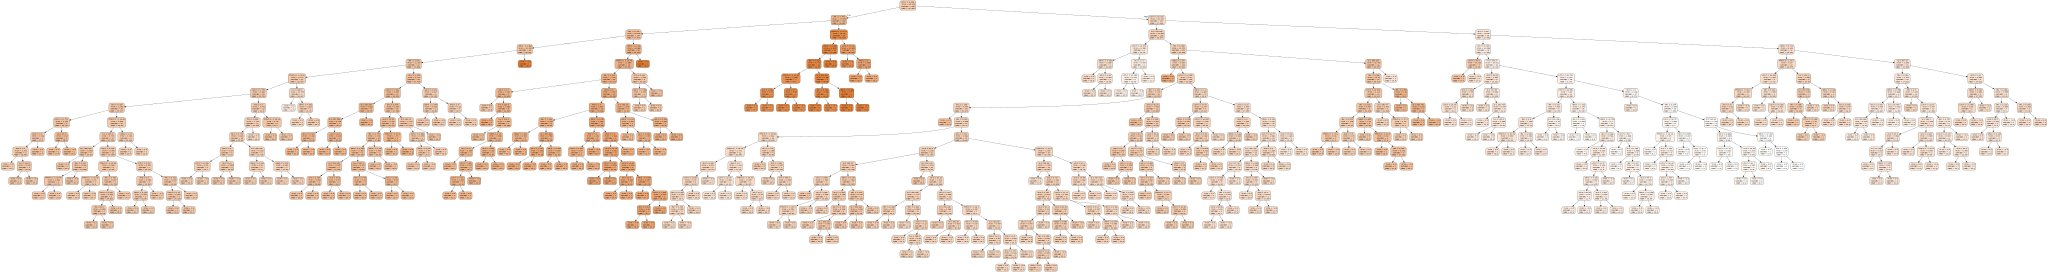

In [121]:
boston = sk.datasets.load_boston()
print(boston.feature_names)
features = boston.data
prices = boston.target
train_features, test_features, train_prices, test_prices = train_test_split(features, prices, test_size = 0.33)
dtr = tree.DecisionTreeRegressor()
dtr.fit(train_features, train_prices)
predict_prices = dtr.predict(test_features)
print('回归树二乘偏差均值 ', sk.metrics.mean_squared_error(test_prices, predict_prices))
print('回归树绝对值偏差均值 ', sk.metrics.mean_absolute_error(test_prices, predict_prices))

dot_data = tree.export_graphviz(dtr, out_file=None, 
                      feature_names=boston.feature_names,  
#                       class_names=boston.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph